In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [24]:
data = pd.read_excel('Lumini_dataset.xlsx')
data['Period'] = data['año'].astype(str) + data['Mes'].astype(str)
from datetime import datetime
data['Index'] = data['Period'].apply(lambda x: datetime.strptime(x, '%Y%m'))
data = data.set_index('Index')

In [25]:
data.head(5)

,año,Mes,Ventas,Period
Index,,,,
1983-01-01,1983,1,1421,19831
1983-02-01,1983,2,1434,19832
1983-03-01,1983,3,1952,19833
1983-04-01,1983,4,1533,19834
1983-05-01,1983,5,1853,19835


In [26]:
print ('\n Data Types:')
print (data.dtypes)


 Data Types:
año        int64
Mes        int64
Ventas     int64
Period    object
dtype: object


In [27]:
ts = data['Ventas']

ts.head(5)

Index
1983-01-01    1421
1983-02-01    1434
1983-03-01    1952
1983-04-01    1533
1983-05-01    1853
Name: Ventas, dtype: int64

In [28]:
#1. Lista de valores:
ts['1983-01-01']

1421

In [29]:
from datetime import datetime
ts['1983']

Index
1983-01-01    1421
1983-02-01    1434
1983-03-01    1952
1983-04-01    1533
1983-05-01    1853
1983-06-01    1516
1983-07-01    1663
1983-08-01    1969
1983-09-01    1304
1983-10-01    1465
1983-11-01    1369
1983-12-01     979
Name: Ventas, dtype: int64

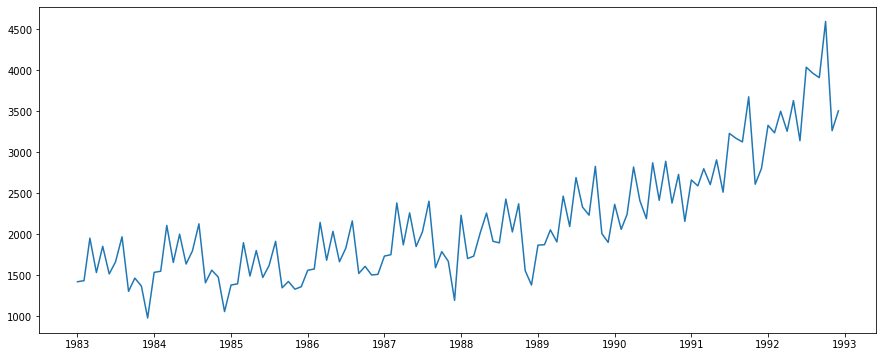

In [30]:
plt.plot(ts)

In [31]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
     #Hallamos los valores de la serie
    rolmean = timeseries.rolling(6).mean()
    #rolmean = ts_log.rolling(12).mean()
    rolstd = timeseries.rolling(6).std()
    #Hacemos Plot de los valores de la serie
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

# Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags 	Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

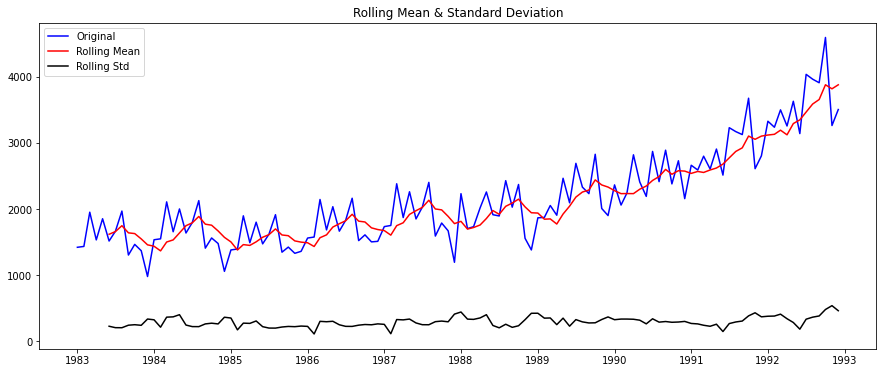

Results of Dickey-Fuller Test:
Test Statistic                   5.653422
p-value                          1.000000
#Lags \tUsed                    12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [32]:
test_stationarity(ts)

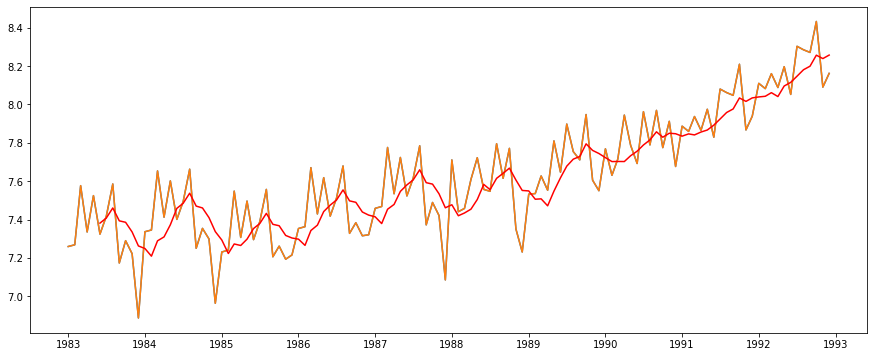

In [33]:
######################################
# HACEMOS TRANSFORMACIONES
ts_log = np.log(ts)
plt.plot(ts_log)

moving_avg = ts_log.rolling(6).mean()

plt.plot(ts_log)
plt.plot(moving_avg, color='red')

ts_log_moving_avg_diff = ts_log - moving_avg

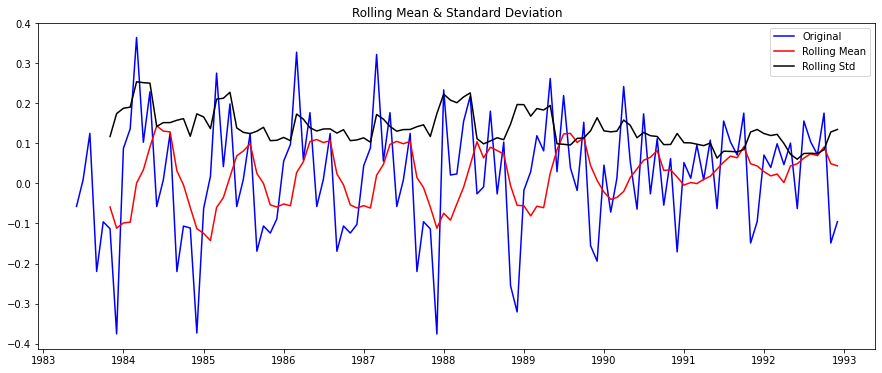

Results of Dickey-Fuller Test:
Test Statistic                  -1.797851
p-value                          0.381529
#Lags \tUsed                    12.000000
Number of Observations Used    102.000000
Critical Value (1%)             -3.496149
Critical Value (5%)             -2.890321
Critical Value (10%)            -2.582122
dtype: float64


In [34]:
ts_log_moving_avg_diff.dropna(inplace=True)

test_stationarity(ts_log_moving_avg_diff)